# free-fall-dirichlet
simulate a free fall using finite difference method with dirichlet b.c.

## analytical solution
use the information at https://github.com/dudung/xeqn/blob/main/src/0020.md as follow.

$t$ | $v$ | $y$
:-: | :-: | :-:
$0$ |  $20$ |  $0$
$1$ |  $10$ | $15$
$2$ |   $0$ | $20$
$3$ | $-10$ | $15$
$4$ | $-20$ |  $0$

## diriclet b.c.
$y(t_0) = y_0$ and $y(t_N) = y_N$, which are from previous table, e.g. $y(2) = 20$.

4
16
[[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 

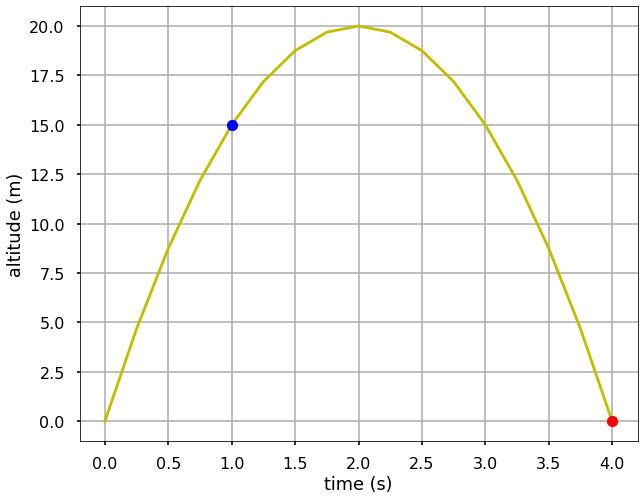

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

# gravity
g = 10

# time
tbeg = 0
tend = 4

# discretization of time
N = 16
h = (tend - tbeg) / N

# left b.c.
t0 = 1
y0 = 15
n0 = int(t0/h)
print(n0)

# right b.c. according to given table
yN = 0
tN = 4
nN = int(tN/h)
print(nN)

# Get A
A = np.zeros((N+1, N+1))
A[0, n0] = 1
A[N, nN] = 1
for i in range(1, N):
    A[i, i-1] = 1
    A[i, i] = -2
    A[i, i+1] = 1

print(A)

# Get b
b = np.zeros(N+1)
b[1:-1] = -g * h**2
b[0] = y0
b[N] = yN
print(b)

# solve the linear equations
y = np.linalg.solve(A, b)

# time variable
t = np.linspace(tbeg, tend, N + 1)

# show results
plt.figure(figsize=(10,8))
plt.plot(t, y, 'y')
plt.grid()
plt.plot(t0, y0, 'bo')
plt.plot(tN, yN, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.show()

## refs
1. Qingkai Kong, Timmy Siauw, Alexandre Bayen, "Finite Difference Method", Python Programming And Numerical Methods: A Guide For Engineers And Scientists, 1st edition, Nov 2020, url <https://pythonnumericalmethods.berkeley.edu/notebooks/chapter23.03-Finite-Difference-Method.html> [20221026]